<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/Proyecto_GRP4_LCRouting_vdeleon_jmgarcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Victor de Leon 22922 UVG-TIGO**
# **Jaime Miguel Garcia 22891 UVG-TIGO**
# **Proyecto Final GRP4**

# **CURSO BUSINESS ANALYTICS MODELS** **/PL LCR Internacional**

# **ANTONIO MEDRANO UVG**


**Descripcion del Problema**

Ante una eventual situación donde por necesidades de actualización de la herramienta actual o falla en esta y se requiera utilizar algun mecanismo externo para calcular y poder realizar operaciones de least cost routing, se ha pensado en contar con una herramienta inhouse basada en código python y los algoritmos pertinentes para resolver similar necesidad durante las situaciones en que se requiera. Para ello se ha pensado en generar esta herramienta que pueda ayudar a llevar de manera simple la propuesta de soluciones de enrutamiento que permitan al departamento poder tener alternativas de cálculo según requiera el negocio.

En la actualidad se tienen 5 Carriers principales sobre los que descansa la solución del tráfico   internacional saliente que para efectos del Proyecto denominaremos Carrier1, Carrier2, Carrier3, Carrier4 y Carrier5, por medio de los cuales se está cursando el equivalente de 32MM de minutos mensuales en llamadas internacionales salientes. Con un costo mensual de aproximadamente $40K.

Como parte de las especificaciones se requiere que la herramienta considere los básicos relacionados a aspectos contractuales como los mínimos y máximos de minutos mensuales por carrier y aspectos de calidad basados principalmente en el indicador de ASR (Answer Seizure Rate).



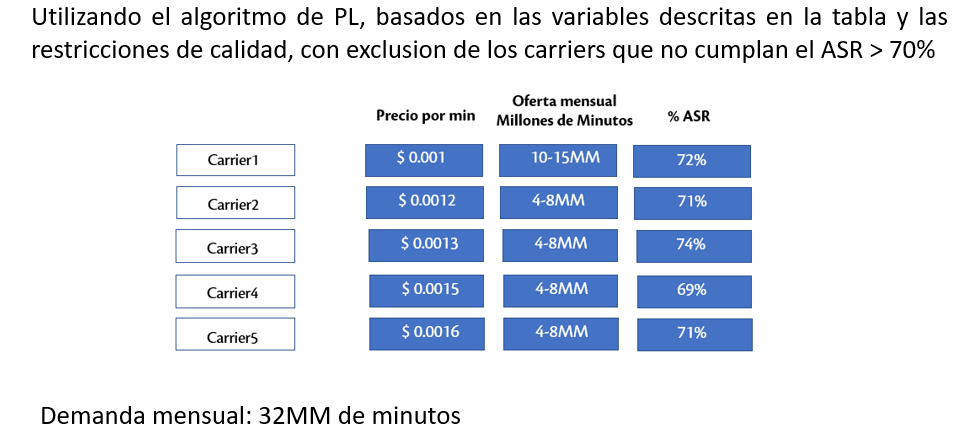


Se pretende que el modelo de optimización permita optar por los mejores precios y los costos mas bajos no sin dejar de lado la calidad y los volumenes de minutos minimos contractuales con los carriers internacionales.

El modelo haría las veces de un Least Cost Routing LCR para la distribución de enrutamiento de tráfico internacional saliente más económico.

El personal del departamento de Interconexión de la compañía necesita generar el calculo de menor costo para los enrutamientos de tráfico saliente Internacional de llamadas de voz, debido a que la herramienta oficial tuvo inconvenientes por actualizaciones anuales. Se requiere que  mediante Programación Lineal se calcule por lo menos en el transcurso de un mes, en lo que se resuelven los problemas de actualización de parches en el software de la herramienta oficial.

Las condiciones actuales son de que de un estimado de 32MM de minutos mensuales salientes se pueda asignar en base a 6 criterios los nuevos enrutamientos considerando

1) Los precios de la llamada por minuto de los 5 carrier para la ultima actualización son los siguientes: Carrier1, $0.0010; Carrier2, $0.0012; Carrier3, $0.0013; Carrier4, $0.0015; Carrier5, $0.0016.
2) La calidad que ofrecen los carrier medidos en base al ASR (Answer Seizure Rate) último actualizado es de: Carrier1, 72%; Carrier2, 71%; Carrier3, 74%; Carrier4, 69%; Carrier5, 71%.
3) El ASR por carrier no debe de bajar del 70% de lo contrario debe de ser excluido de los carrier a ser considerados en los enrutamientos.
4) Es necesario que el tráfico se enrute hacia al menos 3 carriers.
5) El volumen de minutos por carrier no deben bajar de las siguientes cantidades: Carrier1, 10000000; Carrier2, 4000000; Carrier3, 4000000; Carrier4, 4000000; Carrier5, 4000000.
6) El volumen de minutos por carrier no deben exceder las siguientes cantidades: Carrier1, 15000000; Carrier2, 8000000; Carrier3, 8000000; Carrier4, 8000000; Carrier5, 8000000.

La herramienta deberá calcular la opcion menos costosa de enrutamiento de llamadas por los diversos carriers dados los datos proporcionados considerando los precios, la calidad de ASR obtenida en la ultima actualización y las restricciones respecto al umbral minimo de ASR.

## **Instalacion de Librerias Python**

In [1]:
#modelovariable
!pip install pulp numpy

import numpy as np
import pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 85.9 MB/s eta 0:00:00


## **Datos Proporcionados**

In [2]:
# Datos proporcionados
carriers = ['Carrier1', 'Carrier2', 'Carrier3', 'Carrier4', 'Carrier5']
demand = 32000000  # 32MM minutos mensuales
asr_threshold = 0.70  # ASR mínimo requerido
min_selected_carriers = 3  # Mínimo de carriers a seleccionar

# Calidad de ASR por carrier
asr_quality = {
    'Carrier1': 0.72,
    'Carrier2': 0.71,
    'Carrier3': 0.74,
    'Carrier4': 0.69,
    'Carrier5': 0.71,
}

# Precios por minuto por carrier
prices = {
    'Carrier1': 0.0010,
    'Carrier2': 0.0012,
    'Carrier3': 0.0013,
    'Carrier4': 0.0015,
    'Carrier5': 0.0016,
}

# Mínimo y máximo de minutos por carrier
min_minutes = {
    'Carrier1': 10000000,
    'Carrier2': 4000000,
    'Carrier3': 4000000,
    'Carrier4': 4000000,
    'Carrier5': 4000000,
}

max_minutes = {
    'Carrier1': 15000000,
    'Carrier2': 8000000,
    'Carrier3': 8000000,
    'Carrier4': 8000000,
    'Carrier5': 8000000,
}



## **Crear Problema Minimize**

In [3]:
# Crear problema de minimización
problem = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)



## **Variables de Decisión**

In [4]:
# Variables de decisión: minutos a enrutar por carrier
routing_vars = {carrier: pulp.LpVariable(f"Routing_{carrier}", 0, None, pulp.LpInteger) for carrier in carriers}



## **Funcion Objetivo**

In [5]:
# Función objetivo: minimizar el costo total
problem += pulp.lpSum(routing_vars[carrier] * prices[carrier] for carrier in carriers)



## **Restricciones**

In [6]:
# Restricciones
selected_carriers = []
for carrier in carriers:
    # Restricción de calidad de ASR
    if asr_quality[carrier] < asr_threshold:
        problem += routing_vars[carrier] == 0
    else:
        selected_carriers.append(routing_vars[carrier])
        # Restricción de volumen mínimo y máximo
        problem += routing_vars[carrier] >= min_minutes[carrier]
        problem += routing_vars[carrier] <= max_minutes[carrier]

# Restricción de demanda total
problem += pulp.lpSum(selected_carriers) == demand

# Restricción de mínima cantidad de carriers seleccionados
problem += pulp.lpSum([selected_carriers[i] for i in range(min_selected_carriers)]) >= demand * 0.9



## **Imprimir Modelo**

In [8]:
problem

Minimize_Cost:
MINIMIZE
0.001*Routing_Carrier1 + 0.0012*Routing_Carrier2 + 0.0013*Routing_Carrier3 + 0.0015*Routing_Carrier4 + 0.0016*Routing_Carrier5 + 0.0
SUBJECT TO
_C1: Routing_Carrier1 >= 10000000

_C2: Routing_Carrier1 <= 15000000

_C3: Routing_Carrier2 >= 4000000

_C4: Routing_Carrier2 <= 8000000

_C5: Routing_Carrier3 >= 4000000

_C6: Routing_Carrier3 <= 8000000

_C7: Routing_Carrier4 = 0

_C8: Routing_Carrier5 >= 4000000

_C9: Routing_Carrier5 <= 8000000

_C10: Routing_Carrier1 + Routing_Carrier2 + Routing_Carrier3
 + Routing_Carrier5 = 32000000

_C11: Routing_Carrier1 + Routing_Carrier2 + Routing_Carrier3 >= 28800000

VARIABLES
0 <= Routing_Carrier1 Integer
0 <= Routing_Carrier2 Integer
0 <= Routing_Carrier3 Integer
0 <= Routing_Carrier4 Integer
0 <= Routing_Carrier5 Integer

## **Resolver el problema y ver resultados**

In [10]:
# Resolver el problema
problem.solve()

# Imprimir resultados en minutos
print("Resultado en minutos:")
for carrier in carriers:
    if routing_vars[carrier].varValue > 0:
        print(f"{carrier}: {routing_vars[carrier].varValue} minutos")

print(f"Costo total: ${pulp.value(problem.objective):.2f}")

# Imprimir resultados en porcentajes
print("\nResultado en porcentajes:")
for carrier in carriers:
    if routing_vars[carrier].varValue > 0:
        percentage = (routing_vars[carrier].varValue / demand) * 100
        print(f"{carrier}: {percentage:.2f}%")

for v in problem.variables():
  print(v.name,"=", v.value())



Resultado en minutos:
Carrier1: 15000000.0 minutos
Carrier2: 8000000.0 minutos
Carrier3: 5800000.0 minutos
Carrier5: 4000000.0 minutos
Costo total: $38540.00

Resultado en porcentajes:
Carrier1: 46.88%
Carrier2: 25.00%
Carrier3: 18.12%
Carrier5: 12.50%
Routing_Carrier1 = 15000000.0
Routing_Carrier2 = 8000000.0
Routing_Carrier3 = 5800000.0
Routing_Carrier4 = 0.0
Routing_Carrier5 = 4000000.0
